In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Loading the inbuilt titanic dataset from seaborn

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
df = pd.DataFrame(titanic)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Data cleaning

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.drop(["deck"],inplace=True,axis=1)
df.age.fillna(df.age.mean(),inplace=True)
df.embarked.fillna(df.embarked.mode()[0],inplace=True)
df.embark_town.fillna(df.embark_town.mode()[0],inplace=True)

In [7]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

/home/pict/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

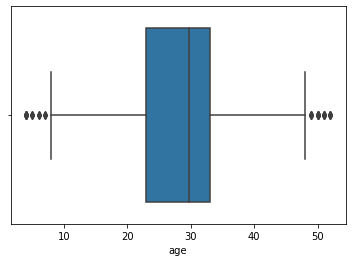

In [14]:
Q1 = df["age"].quantile(0.25)
Q2 = df["age"].quantile(0.50)
Q3 = df["age"].quantile(0.75)

IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
up_lim = Q3 +( 1.5 * IQR)

df = df[(df["age"] >= low_limit) & (df["age"] <= up_lim)]
sns.boxplot(df["age"])

## Box plot

<AxesSubplot:xlabel='sex', ylabel='age'>

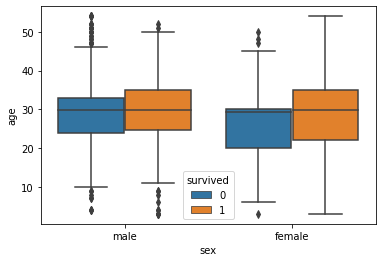

In [9]:
sns.boxplot(x="sex", y="age", hue="survived", data=df)

## Bar Plot

<AxesSubplot:xlabel='sex', ylabel='age'>

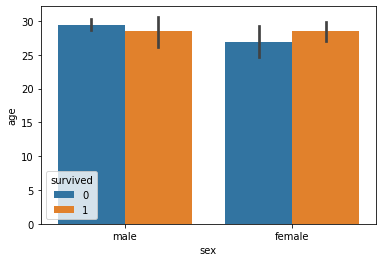

In [10]:
sns.barplot(x="sex", y="age", hue="survived", data=df)

## Violinplot

<AxesSubplot:xlabel='survived', ylabel='age'>

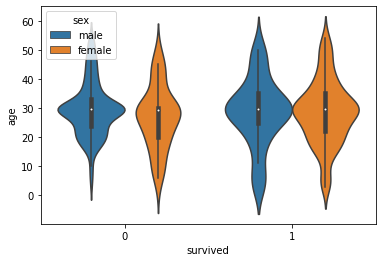

In [11]:
sns.violinplot(x="survived", y="age", hue='sex', data=df)

## Swarm Plot

/home/pict/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pict/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='age'>

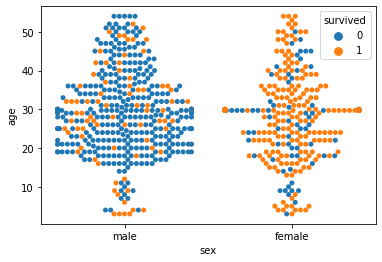

In [12]:
sns.swarmplot(x="sex", y="age", hue="survived", data=df)

## Strip plot

<AxesSubplot:xlabel='sex', ylabel='age'>

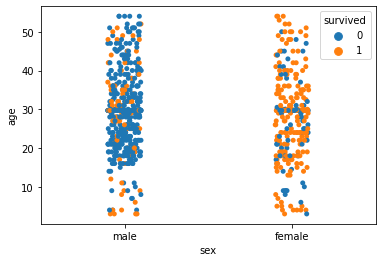

In [13]:
sns.stripplot(x="sex", y="age", hue="survived", data=df)